In [13]:
import numpy
import flowx 
import simulation
import time
from matplotlib import pyplot
%matplotlib inline

# Dirichlet BC

In [14]:
nx, ny = 40, 40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0
center_vars = [ 'asol', 'ivar', 'rvar', 'eror' ]
user_bc = 'dirichlet'
bc_type = { 'ivar': [ user_bc, user_bc, user_bc, user_bc ] }
bc_val  = { 'ivar': [ 0.0, 0.0, 0.0, 0.0 ] }
grid = flowx.Grid( 'cell-centered', center_vars, nx, ny, xmin, xmax, ymin, ymax, user_bc_type = bc_type, user_bc_val = bc_val )

In [15]:
simulation.get_analytical( grid, 'asol', user_bc )
simulation.get_rhs( grid, 'rvar', user_bc )

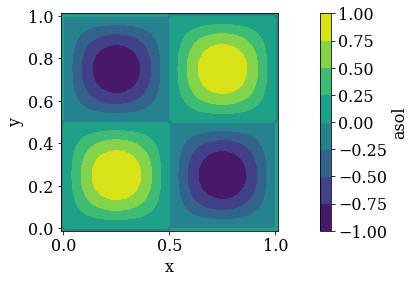

In [16]:
flowx.io.plot_contour( grid, 'asol' )

In [17]:
start = time.time()
ites, res = flowx.poisson.solve_gauss_seidel( grid, 'ivar', 'rvar', maxiter = 10000, tol = 1e-9, verbose = True )
print( time.time() - start, 'seconds' )

Gauss-Seidel method:
- Number of iterations: 1401
- Final residual: 9.953000548126754e-10
7.412699937820435 seconds


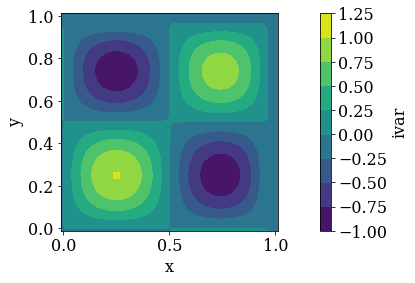

In [18]:
flowx.io.plot_contour( grid, 'ivar' )

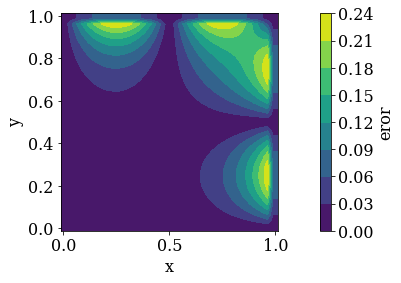

In [19]:
grid.get_error( 'eror', 'ivar', 'asol' )
flowx.io.plot_contour( grid, 'eror')

## Refine Grid

In [7]:
nx2, ny2 = 100, 100
grid2 = flowx.Grid( 'cell-centered', center_vars, nx2, ny2, xmin, xmax, ymin, ymax, user_bc_type = bc_type, user_bc_val = bc_val)
simulation.get_analytical( grid2, 'asol', user_bc)
simulation.get_rhs( grid2, 'rvar', user_bc)

In [8]:
start = time.time()
ites, res = flowx.poisson.solve_gauss_seidel( grid2, 'ivar', 'rvar', maxiter = 10000, tol = 1e-9, verbose = True )
print( time.time() - start, 'seconds' )

KeyboardInterrupt: 

In [ ]:
flowx.io.plot_contour( grid2, 'ivar' )

In [ ]:
grid2.get_error( 'eror', 'ivar', 'asol' )
flowx.io.plot_contour( grid2, 'eror')

In [ ]:
er = [ numpy.max( grid.get_values( 'eror' ) ), numpy.max( grid2.get_values( 'eror' ) ) ]
num_points = [ nx, nx2 ]
pyplot.figure( figsize = ( 7, 5 ) )
pyplot.loglog( num_points, er, '.-' )
pyplot.xlabel( 'Number of Grid Points' )
pyplot.ylabel( 'Error' )
pyplot.grid();

# Neumann BC

In [ ]:
user_bc = 'neumann'
bc_type = {'ivar': [user_bc, user_bc, user_bc, user_bc]}
gridN = flowx.Grid( 'cell-centered', center_vars, nx, ny, xmin, xmax, ymin, ymax, user_bc_type = bc_type, user_bc_val = bc_val)
simulation.get_analytical( gridN, 'asol', user_bc)
simulation.get_rhs( gridN, 'rvar', user_bc)

In [ ]:
start = time.time()
ites, res = flowx.poisson.solve_gauss_seidel( gridN, 'ivar', 'rvar', maxiter = 10000, tol = 1e-9, verbose = True )
print( time.time() - start, 'seconds' )

In [ ]:
flowx.io.plot_contour( gridN, 'ivar' )

In [ ]:
gridN.get_error( 'eror', 'ivar', 'asol' )
flowx.io.plot_contour( gridN, 'eror')

## Refine Grid

In [ ]:
gridN2 = flowx.Grid( 'cell-centered', center_vars, nx2, ny2, xmin, xmax, ymin, ymax, user_bc_type = bc_type, user_bc_val = bc_val)
simulation.get_analytical( gridN2, 'asol', user_bc)
simulation.get_rhs( gridN2, 'rvar', user_bc)

In [ ]:
start = time.time()
ites, res = flowx.poisson.solve_gauss_seidel( gridN2, 'ivar', 'rvar', maxiter = 10000, tol = 1e-9, verbose = True )
print( time.time() - start, 'seconds' )

In [ ]:
flowx.io.plot_contour( gridN2, 'ivar' )

In [ ]:
gridN2.get_error( 'eror', 'ivar', 'asol' )
flowx.io.plot_contour( gridN2, 'eror')

In [ ]:
er = [ numpy.max( gridN.get_values( 'eror' ) ), numpy.max( gridN2.get_values( 'eror' ) ) ]
num_points = [ nx, nx2 ]
pyplot.figure( figsize = ( 7, 5 ) )
pyplot.loglog( num_points, er, '.-' )
pyplot.xlabel( 'Number of Grid Points' )
pyplot.ylabel( 'Error' )
pyplot.grid();